# SVM Classification Tutorial
Generated: 2025-09-13T01:20:38

This notebook shows a complete, minimal workflow for **SVM** on a synthetic binary classification dataset with 12 features.

**What you'll do:**
1. Load the dataset (`svm_data.csv`) with 12 feature columns (`f1..f12`) and a `target` (0/1).
2. Explore shapes and basic stats.
3. Train/validation split.
4. Preprocess (scaling where appropriate).
5. Train a SVM classifier with reasonable defaults.
6. Evaluate with accuracy, precision, recall, F1, confusion matrix, ROC-AUC.
7. Save the fitted model (optional).


In [3]:
# Setup
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay

import matplotlib.pyplot as plt

# Load data
data_path = "../datasets/svm_data.csv"
df = pd.read_csv(data_path)

print("Shape:", df.shape)
df.head()

Shape: (800, 13)


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,target
0,0.375255,0.064923,-2.311704,-4.777166,0.330603,-0.544670,0.764035,-0.075645,-0.871844,-1.057089,-1.237339,2.175342,0
1,-2.235663,-1.088129,-0.595073,-4.373337,1.746367,-0.916633,0.203139,1.175135,1.111664,-3.724559,-0.480944,0.463340,1
2,-2.365087,-0.099748,-0.005723,6.803507,-0.478950,-3.858886,-2.428794,-0.987992,0.919224,-1.062754,-0.312670,-5.108230,1
3,-5.408377,-0.143484,1.030913,-2.837718,0.456914,-3.010713,-3.662786,-0.742657,1.198672,-5.804014,-0.009305,1.039298,1
4,-0.634205,0.037834,-0.711380,-1.865094,-0.286176,-0.120672,-0.809555,-0.098735,-1.700611,-1.389376,-2.341492,0.079763,0


In [4]:
# Basic EDA
print(df.describe().T)
print("\nClass distribution:\n", df['target'].value_counts(normalize=True).rename('proportion'))

        count      mean       std        min       25%       50%       75%  \
f1      800.0 -0.041199  3.286727  -9.525018 -2.400776 -0.498679  1.959757   
f2      800.0  0.052210  1.008213  -3.311469 -0.591084  0.012867  0.742629   
f3      800.0 -0.582954  1.908158  -5.660832 -1.911627 -0.710077  0.550620   
f4      800.0 -0.646907  4.107291 -10.213287 -3.520063 -1.090914  1.814042   
f5      800.0 -0.059305  2.108770  -6.013163 -1.580329  0.018715  1.520610   
f6      800.0 -0.593740  1.909149  -5.439482 -1.954012 -0.649866  0.765089   
f7      800.0 -0.527993  2.021469  -6.275360 -1.861460 -0.670987  0.811801   
f8      800.0  0.017340  0.957509  -2.870537 -0.650958 -0.021161  0.671885   
f9      800.0 -0.575108  1.944470  -6.821478 -1.935436 -0.511216  0.888228   
f10     800.0 -0.504248  1.807616  -5.804014 -1.742855 -0.662261  0.705939   
f11     800.0 -0.557558  1.761748  -4.895167 -1.809688 -0.648434  0.651741   
f12     800.0  0.110468  2.072497  -6.902099 -1.276041  0.138684

In [12]:
# Train/Validation split
X = df.drop(columns=['target'])
y = df['target']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=123, stratify=y
)

X_train.shape, X_val.shape

((560, 12), (240, 12))

In [13]:
# SVM tends to benefit from scaling
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="rbf", C=1.0, gamma="scale", probability=True, random_state=123))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
y_proba = pipe.predict_proba(X_val)[:, 1]

Accuracy : 0.950
Precision: 0.915
Recall   : 0.982
F1-score : 0.947
ROC AUC  : 0.987

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       131
           1       0.91      0.98      0.95       109

    accuracy                           0.95       240
   macro avg       0.95      0.95      0.95       240
weighted avg       0.95      0.95      0.95       240


Confusion Matrix:
 [[121  10]
 [  2 107]]


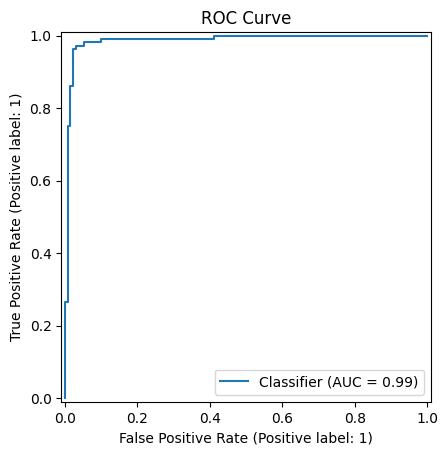

In [14]:
# Evaluation
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_proba)

print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}")
print(f"ROC AUC  : {auc:.3f}")

print("\nClassification Report:\n", classification_report(y_val, y_pred))

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix:\n", cm)

# ROC Curve (uses matplotlib; no style or color specified)
RocCurveDisplay.from_predictions(y_val, y_proba)
plt.title("ROC Curve")
plt.show()

In [8]:
# (Optional) Save model with joblib for later reuse
# Uncomment to persist
# import joblib
# joblib.dump(clf if 'clf' in globals() else pipe, "model.joblib")
